# Preparación y Limpieza de datos ![](https://www.r-project.org/Rlogo.png)



Muchos de los datasets a los que los que nos enfrentaremos estarán sucios de una manera
o de otra. Por ejemplo:


+ <font color=#0000FF>Valores de una variable/atributo codificados como columnas.</font>
+ <font color=#0000FF>Variable codificadas en filas y columnas.</font>
+ <font color=#0000FF>Más de una variable contenida en la misma columna. Por ejemplo: trimestre y año.</font>
+ <font color=#0000FF>Almacenar medidas en distintas unidades en la misma tabla.</font>
+ <font color=#0000FF>Contienen missing values: valores desconocidos que habrá que eliminar o imputar.  </font>
    <font color=#0000FF>OJO! Es importante saber por qué esos valores son desconocidos.</font>
…

Al proceso, por el cual, transformamos un dataset en otro más conveniente para nuestro  análisis, se le llama proceso de **limpieza**.

Se suele decir que el proceso de limpieza y preparación de datos se lleva el **80%** del  tiempo, mientras que el resto de tareas conllevan sólo el **20%**. Es por este motivo, por el  que el proceso de preparación es tan importante.

# Preparación y Limpieza de datos: Exploración

El proceso de exploración tiene como objetivo crear una composición general de un dataset.

Contiene tres fases:
+ <font color=#0000FF>Comprender y asimilar la estructura de los datos.</font>
+ <font color=#0000FF>Ver los datos que lo componen.</font>
+ <font color=#0000FF>Visualizar los datos que lo componen.</font>

Mediante estos tres sencillos pasos podremos identificar los primeros “problemas” en  nuestros datos.

Normalmente nuestro dataset estará contenido en un data frame de R, con las  observaciones en las filas y las variables en las columnas.

## Explorando la Estructura
![cleaning_structure](imgs/10_01.png)

## Explorando los datos
![clean_data](imgs/10_02.png)

## Visualizando los datos
![plot_data](imgs/10_03.png)

In [ ]:
#######################################
# Limpieza: exploración               #
#######################################

# Cargamos el dataset
vinos <- read.csv("dat/wine.csv", 
                  header = T)

# Exploración de la estructura
class(vinos)

In [ ]:
dim(vinos)

In [ ]:
names(vinos)

In [ ]:
str(vinos)

In [ ]:
summary(vinos)

In [ ]:
# Exploración de los datos
head(vinos)

In [ ]:
tail(vinos)

In [ ]:
print(vinos)

In [ ]:
# Visualizando los datos
hist(vinos$alcohol)

In [ ]:
plot(vinos$alcohol, vinos$proline)

# Preparación y limpieza: Poniendo orden

¿Cuáles son los principios de unos datos “limpios”? [Artículo de Hadley Wickham](https://www.jstatsoft.org/article/view/v059i10) en
Journal of Statistical Software.

Estos principios son muy parecidos a los que aplicaríamos al diseñar una base de datos relacional.

Los principios son:
+ <font color=#0000FF>Observaciones en filas.</font>
+ <font color=#0000FF>Variables y atributos como columnas</font>.
+ <font color=#0000FF>Cada fila de la tabla (data frame) contiene únicamente una unidad observacional. O lo
que es los mismo, no mezclar distintas entidades o cosas dentro de la misma tabla.
Todas las observaciones de una variable están medidas en la misma unidad.</font>

Los paquetes `tidyr` y `reshape2` de Hadley Wickham, contienen varias funciones que nos
permitirán poner orden en nuestros datos.

## Preparación y limpieza: datos limpios y ordenados

![limpios](imgs\10_04.png)



## Preparación y limpieza: valores como columnas

![cols](imgs\10_05.png)



## Preparación y limpieza: variables en filas y columnas


![row_cols](imgs\10_06.png)



## `tidyr`: quitando valores como columnas

Para corregir los problemas anteriores usaremos las funciones `gather` y `spread` del paquete
`tidyr`.

La función `gather` une columnas en pares clave valor. Los parámetros de la función son:
+ `data`: el data frame de datos a corregir.
+ `key`: el nombre de la nueva columna que contendrá la clave.
+ `value`: el nombre de la nueva columna que contendrá el valor.
+ `…`: nombres de las columnas a juntar (o no).

La función `spread` separa pares clave valor en columnas. Los parámetros de la función son:
+ `data`: el data frame de datos a corregir.
+ `key`: el nombre de la columna que contiene la clave.
+ `value`: el nombre de la columna que contiene el valor.

In [ ]:
#######################################
# Limpieza: ordenación                #
#######################################

# install.packages('tidyr', repos ="https://cloud.r-project.org")
library(tidyr)

wide_df <- data.frame(col = c("X", "Y"), A = c(1, 4), B = c(2, 5), C = c(3, 6))
wide_df

In [ ]:
# Gather
long_df <- gather(wide_df, my_key, my_val, -col)
long_df

In [ ]:
# Spread
new_wide_df <- spread(long_df, my_key, my_val) #Obtenemos el data.frame original
new_wide_df

## Preparación y limpieza: dos variables en la  misma columna

![two_var_same_col](imgs/10_07.png)

## `tidyr`: separando columnas

Para corregir el anterior problema usaremos la función `separate` del paquete `tidyr`. Esta
función separa una columna en múltiples columnas. Los parámetros de la función son:
+ `data`: el data frame de datos a corregir.
+ `col`: el nombre de la columna a separar.
+ `into`: vector de caracteres con el nombre de las nuevas columnas.
+ `sep`: el separador a emplear. Por defecto se usa como separador cualquier carácter no  alfanumérico.

Existe otra función en el paquete tidyr para realizar el proceso inverso, `unite`. Esta función  une varias columnas en una única columnas. Los parámetros de la función son:
+ `data`: el data frame de datos a corregir.
+ `col`: el nombre de la nueva columna que contendrá la unión.
+ `…`: el nombre de las columnas a unir.
+ `sep`: el separador a emplear. Por defecto: "_".

In [ ]:
treatments <- data.frame(patient = c("X", "Y", "X", "Y", "X", "Y"), 
                         treatment = c("A", "A", "B", "B", "c", "C"), 
                         year_mo = c("2010-10", "2010-10", "2012-08", 
                                     "2012-08", "2014-12", "2014-12"), 
                         responde = c(1, 4, 2, 5, 3, 6))

treatments

In [ ]:
# Separate
treatments_sep <- separate(treatments, year_mo, c("year", "month"))
treatments_sep

In [ ]:
# Unite
new_treatments <- unite(treatments_sep, year_mo, year, month, sep = "-")
new_treatments

## Preparación y limpieza: más de una medida observacional en la misma tabla

![more_than_one_obs](imgs/10_08.png)

Existen personas duplicadas (x3). Esto puede indicar que tenemos que separar en dos data  frames los datos.

OJO! A la hora de separar en varios data frames debemos crear una PK que nos permita  cruzarlos. Similar a las Primary Keys de una base de datos relacional.

## Preparación y limpieza: wide vs long

![wide_long](imgs/10_09.png)

+ Hablamos de **wide datasets cuando  tienen más variables que  observaciones**.

+ Hablamos de **long datasets cuando  tienen más observaciones que  atributos**.

Un wide dataset puede indicar que  tenemos valores almacenados  como columnas. Trataremos de  convertirlo en un long dataset.

## `reshape2`: wide dataset to long dataset

Dentro del paquete reshape2 existe una función, análoga a `gather` de tidyr, para pasar de un
wide dataset a un long dataset: `melt`.

La función `melt` recibe los siguientes parámetros:
+ data`: el data frame de datos a pivotar.
+ `id.vars`: un vector con el nombre de las variables a mantener.
+ `variable.name`: el nombre de la nueva variable que contendrá las variables fundidas.
+ `value.name`: el nombre de la nueva variable que contendrá los valores.

In [ ]:
#install.packages('reshape2', repos ="https://cloud.r-project.org")

library(reshape2)

wide_df <- data.frame(col = c("X", "Y"), A = c(1, 4), B = c(2, 5), C = c(3, 6))
wide_df

In [ ]:
# melt
long_df <- melt(wide_df, id.vars = c("col"), variable.name = "my_key", value.name = "my_val")
long_df

## `reshape2`: long dataset to wide dataset

Dentro del paquete `reshape2` existe otra función, análoga a `spread` de `tidyr`, para pasar de
un wide dataset a un long dataset: `dcast`.

La función `dcast` recibe los siguientes parámetros:
+ `data`: el data frame de datos a pivotar.
+ `variable1 + variable2 + … ~ variable`: `variable1, variable2…` son las columnas que se  mantendrán y `variable` la columna que contiene los valores que generarán nuevas  columnas.
+ `value.var`: nombre de la columna donde están los valores.
+ `fun.agregate`: en el caso de tener múltiples valores por fila especifica la función de
agregación. Por ejemplo: `sum, mean, max…`

In [ ]:
# dcast
new_wide_df <- dcast(long_df, col ~ my_key, value.var = "my_val")
new_wide_df

## Ejercicio

In [ ]:
###################################
# tidyr                           #
###################################
library(tidyr)

# Arregla el siguiente data frame
people_1 <- data.frame(name = c("Jake", "Alice", "Tim", "Denise"), 
                       age = c(34, 55, 76, 19), 
                       brown = c(0, 0, 1, 0), 
                       blue = c(0, 1, 0, 0),
                       other = c(1, 0, 0, 1),
                       height = c(6.1, 5.9, 5.7, 5.1))




# Arregla el siguiente data frame
people_2 <- data.frame(name = c("Jake", "Jake", "Jake", "Alice", "Alice", "Alice"), 
                       measurement = c("n_dog", "n_cats", "n_birds", "n_dog", "n_cats", "n_birds"), 
                       value = c(1, 0, 1, 1, 2, 0))




# Arregla el siguiente data frame
people_3 <- data.frame(name = c("Jake", "Alice", "Tim", "Denise"), 
                       sex_age = c("M:34", "F:55", "M:76", "F:19"), 
                       eye_color = c("other", "blue", "brown", "other"), 
                       height = c(6.1, 5.9, 5.7, 5.1))




# Consigue el data frame original del último arreglo


## Preparación y limpieza: preparando los datos  para el análisis

El último paso del proceso de limpieza es la **preparación de los datos para el análisis**.

Normalmente, nuestro dataset contendrá distintos tipos de variables (cadenas de caracteres,  numéricas, lógicas, fechas…).

Es importante asegurar que cada variable está almacenada en el formato adecuado.

Otro punto especialmente importante es el tratamiento de **missing values y outliers (valores  atípicos)**.

### Preparación y limpieza: conversión de tipos

![as_type](imgs/10_10.png)

Para **manipulación de fechas** es recomendable utilizar el paquete `lubridate` de Hadley
Wickham.

Contiene numerosas funciones para parsear y operar con fechas.

In [ ]:
#######################################
# Limpieza: preparación               #
#######################################

library(lubridate)

ymd("2015-08-25")

In [ ]:
ymd("2015 August 25")

In [ ]:
hms("14:17:07")

In [ ]:
ymd_hms("2015/08/25 13.33.09")

Para **manipulación de cadenas de caracteres** existe el paquete `stringr` de Hadley Wickham.

In [ ]:
library(stringr)
str_trim("    this is a test    ")

In [ ]:
str_pad("244493", width = 7, side = "left", pad = "0")

In [ ]:
names <- c("Sarah", "Tom", "Alice")

In [ ]:
str_detect(names, "Alice")

In [ ]:
str_replace(names, "Alice", "David")

### Preparación y limpieza: missing values

<font color=#0000FF>¿Por qué no están los datos? Es importante descubrir y saber el motivo por el cual faltan
datos en un dataset.</font>

Dependiendo del motivo tendremos principalmente dos (más una) opciones:
+ **<font color=#0000FF>Borrarlos</font>**
+ **<font color=#0000FF>Imputarlos</font>**
    + Ceros
    + Media/Mediana
    + Empleando un modelo para rellenarlos
+ (**<font color=#0000FF>Mantenerlos</font>**)

En R los missing values se representan con `NA`.

Otros valores especiales:
+ `Inf`: ¿pueden representar outliers? Divisiones por cero
+ `NaN`: ¿pueden representar errores?

Para encontrar missing values podemos utilizar algunas de las funciones que hemos visto
anteriormente. Por ejemplo: `is.na(x)`, `summary(x)`…

In [ ]:
#NAs
df <- data.frame(A = c(1, NA, 8, NA),
                 B = c(3, NA, 88, 23),
                 C = c(2, 45, 3, 1))

#Detección
is.na(df) #Util en dataset pequeños.
any(is.na(df))
sum(is.na(df))
summary(df)

Si finalmente decidimos eliminarlos podemos utlizar la función `complete.cases(x)` para
indexar y eliminar o directamente `na.omit(x)`

In [ ]:
#Eliminación
df[complete.cases(df), ]
na.omit(df)

### Preparación y limpieza: outliers

Los **outliers, o valores atípicos**, son valores extremos, distantes del resto de los valores.

Algunas causas por las que pueden existir outliers:
+ <font color=#0000FF>Son errores de medición</font>
+ <font color=#0000FF>Son errores producidos al transcribir los datos</font>
+ <font color=#0000FF>Son medidas válidas</font>
+ <font color=#0000FF>Representan valores por defecto o valores faltantes</font>
…

Una de las herramientas mas útiles será  el **diagrama de caja o boxplot**.

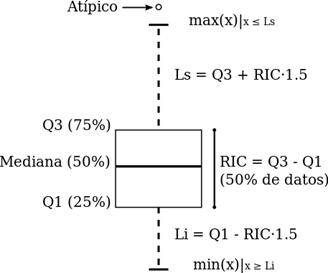

Existen varias herramientas para encontrar outliers: `boxplot`, `hist`, `summary`

In [ ]:
#Outliers
set.seed(10)
x <- c(rnorm(30, mean = 15, sd = 5), -5, 28, 35)

boxplot(x, horizontal = T)

In [ ]:
df2 <- data.frame(A = rnorm(100, 50, 100),
                 B = c(rnorm(99, 50, 10), 500),
                 C = c(rnorm(99, 50, 10), -1))

summary(df2)

In [ ]:
hist(df2$B, 20) #¿Qué le pasa al 500? Es un error de medición.

In [ ]:
boxplot(df2)

Dependiendo del contexto debemos decidir que hacer:
+ Eliminarlos. ¿Puede la edad de una persona ser negativa? Valores sin sentido. ¿Y superior a 200? Valores tan extremos que no tienen sentido.
+ Dejarlos ¿Puede la edad de una persona ser 110?